In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


In [2]:

# 1. CONSTRUÇÃO DO CIRCUITO
# Criamos um circuito com 2 Qubits e 2 Bits Clássicos (para guardar o resultado)
qc = QuantumCircuit(2, 2)


In [3]:

# Aplicamos a porta Hadamard (H) no qubit 0
# Matematicamente: Leva |0> para uma superposição (50% 0, 50% 1)
qc.h(0)


In [4]:

# Aplicamos a porta CNOT (Control-NOT)
# O Qubit 0 é o controle, o Qubit 1 é o alvo.
# Se o Qubit 0 for 1, ele inverte o Qubit 1.
# Como o Qubit 0 está em superposição, eles ficam EMARANHADOS.
qc.cx(0, 1)


In [5]:

# Medimos os qubits
# Qubit 0 -> guarda no Bit 0
# Qubit 1 -> guarda no Bit 1
qc.measure([0, 1], [0, 1])


In [6]:

# Desenha o circuito no terminal para vermos o que criámos
print("--- Desenho do Circuito ---")
print(qc.draw(output='text'))


--- Desenho do Circuito ---
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


Isto mostra visualmente a álgebra linear que discutimos. O H é aquela matriz $2\times2$ de superposição. O traço vertical com o símbolo X em baixo é a operação CNOT.

In [7]:

# 2. EXECUÇÃO (SIMULAÇÃO)
simulador = AerSimulator()

# Transpilação: otimiza o circuito para o backend específico (neste caso, o simulador)
circuito_compilado = transpile(qc, simulador)

# Rodamos a simulação 1000 vezes (shots)
job = simulador.run(circuito_compilado, shots=1000)

# 3. ANÁLISE DE RESULTADOS
resultado = job.result()
contagens = resultado.get_counts()

print("\n--- Resultados da Medição (1000 execuções) ---")
print(contagens)


--- Resultados da Medição (1000 execuções) ---
{'00': 489, '11': 511}


Lembre-se da nossa discussão sobre Álgebra Linear.

- O qubit 0 estava em superposição (era 0 e 1 ao mesmo tempo).
- O qubit 1 era puramente 0.

Quando aplicamos o CNOT, criámos um estado onde: ou ambos são 0, ou ambos são 1. Não existe probabilidade de sair 01 ou 10.

Matematicamente, você acabou de criar este vetor de estado:

$$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

Acabou de realizar a operação fundamental que permite computadores quânticos serem mais poderosos que supercomputadores clássicos: criou uma correlação que não existe na física clássica.

## Visualização avançada

Lembre-se da nossa álgebra linear: dissemos que o qubit é um vetor. A Esfera de Bloch é simplesmente a representação geométrica desse vetor num espaço 3D.

### 1. O Conceito: Navegando na Esfera

Imagine o planeta Terra:

* **Pólo Norte:** Representa o estado .
* **Pólo Sul:** Representa o estado .
* **Linha do Equador:** Representa os estados de **Superposição Máxima** (onde há 50% de chance de ser 0 e 50% de ser 1).

O "vetor de estado" é uma seta que começa no centro da esfera e toca a superfície.

* Se a seta aponta para cima, o qubit é 0.
* Se a seta aponta para baixo, o qubit é 1.
* Se a seta aponta para o horizonte (Equador), o qubit está "confuso" (superposição).

### 2. A Matemática por trás da Imagem

Para desenhar esse vetor em 3D, reescrevemos a nossa fórmula  usando ângulos geométricos ( e ):

Não se preocupe em decorar isso agora. O importante é entender os controles:

* **Ângulo  (Latitude):** Controla a probabilidade de medir 0 ou 1. (Mover do Norte para o Sul).
* **Ângulo  (Longitude/Fase):** É a "fase quântica". Gira a seta ao redor do eixo Z. Isso não muda a probabilidade de 0 ou 1, mas é crucial para algoritmos de interferência.

### 3. Prática: Visualizando a Superposição

Para visualizar a esfera, não podemos "medir" o qubit (pois medir colapsa a esfera para um pólo). Temos de pedir ao simulador o **Vetor de Estado** interno.

Primeiro, instale a biblioteca de gráficos:

```bash
pip install matplotlib pylatexenc

```

*(O `pylatexenc` melhora o desenho dos circuitos, opcional mas recomendado).*

Agora, vamos ver o qubit "girar" do Norte para o Equador.


In [8]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Configurar para exibir figuras inline no notebook
%matplotlib inline

Gerando imagem do Estado Zero (Pólo Norte)...


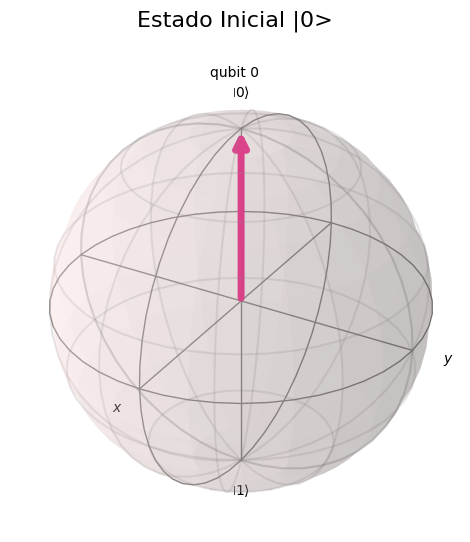

In [9]:

# --- 1. Estado Inicial (|0>) ---
# Um circuito vazio começa sempre em zero
qc_zero = QuantumCircuit(1)

# Extraímos o estado matemático (vetor)
estado_zero = Statevector(qc_zero)

print("Gerando imagem do Estado Zero (Pólo Norte)...")

# Nota: plot_bloch_multivector retorna uma figura matplotlib
fig1 = plot_bloch_multivector(estado_zero, title="Estado Inicial |0>")


Gerando imagem da Superposição (Equador)...


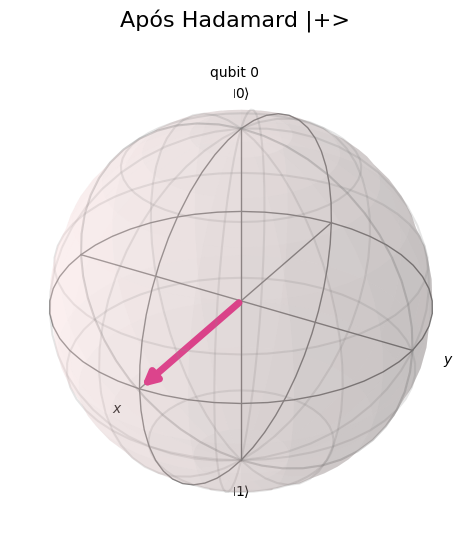

In [13]:
# --- 2. Estado de Superposição (Apicando Hadamard) ---
qc_super = QuantumCircuit(1)
qc_super.h(0) # Aplica H
# qc_super.z(0) # Aplica Z para mostrar diferença de fase
estado_super = Statevector(qc_super)

print("Gerando imagem da Superposição (Equador)...")
fig2 = plot_bloch_multivector(estado_super, title="Após Hadamard |+>")

Gerando imagem do Estado Invertido (Pólo Sul)...


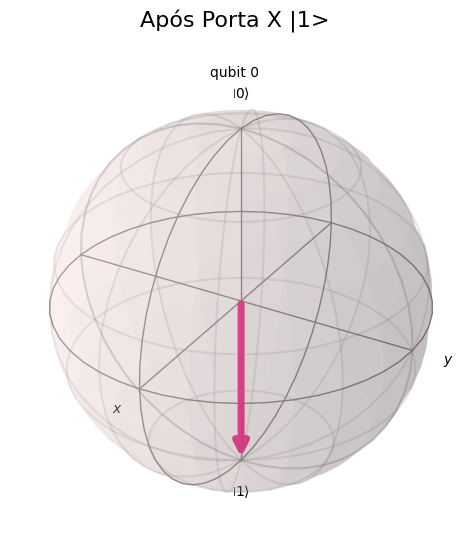

In [11]:

# --- 3. Estado Invertido (Aplicando X) ---
qc_inv = QuantumCircuit(1)
qc_inv.x(0) # Aplica X
estado_inv = Statevector(qc_inv)

print("Gerando imagem do Estado Invertido (Pólo Sul)...")
fig3 = plot_bloch_multivector(estado_inv, title="Após Porta X |1>")



### O que você verá nas janelas:

1. **Figura 1 (Estado Inicial):** A seta vermelha aponta exatamente para o **Topo (Eixo Z positivo)**. Isso é |0⟩.
   
2. **Figura 2 (Hadamard):** A seta vermelha desceu e aponta para a **Frente (Eixo X positivo)**. Ela está na linha do Equador.
* Se você medisse agora, teria 50/50 de chance.
* Note que ela não aponta para "lugar nenhum" entre os pólos, ela aponta para uma direção específica (X+). Isso significa que é uma superposição com fase positiva (|+⟩).

3. **Figura 3 (Porta X):** A seta vermelha aponta para o **Fundo (Eixo Z negativo)**. Isso é |1⟩.



### Onde a intuição falha (Onde entra a Fase)

Tente fazer uma pequena alteração no código. Adicione uma porta Z (`qc.z(0)`) logo após a porta H na etapa 2.

A porta Z gira o qubit ao redor do eixo vertical.

* **Visualmente:** A seta continuará no equador (50% de chance de 0 ou 1), mas apontará para a **esquerda** ou para **trás**.
* **Significado:** A probabilidade não mudou, mas a *fase* mudou. Se você tentar combinar esse qubit com outro depois, essa direção da seta mudará completamente o resultado da interferência (construtiva ou destrutiva).




### Resumo até aqui

Você já dominou:

1. **Matemática:** Vetores e Matrizes.
2. **Código:** Criar circuitos no Qiskit.
3. **Visualização:** Entender o qubit como uma seta na Esfera de Bloch.